<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/No2__Convolutional_neural_network__UTS_Deep_Learning__2440057672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference: 
- https://keras.io/api/models/model_training_apis/
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
- https://keras.io/api/layers/convolution_layers/convolution2d/
- https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7
- https://stackoverflow.com/questions/71704268/using-tf-keras-utils-image-dataset-from-directory-with-label-list
- https://towardsdatascience.com/how-to-predict-an-image-with-keras-ca97d9cd4817
- https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e

In [ ]:
pip install tensorflow tensorflow-gpu opencv-python matpotlib

  Using cached tensorflow_gpu-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matpotlib (from versions: none)
ERROR: No matching distribution found for matpotlib


# IMPORT LIBRARIES

In [ ]:
import tensorflow as tf
import os

In [ ]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.3.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


python-dateutil                    2.8.2
python-lsp-black                   1.0.0
python-lsp-jsonrpc                 1.0.0
python-lsp-server                  1.2.4
python-slugify                     5.0.2
pytz                               2021.3
PyWavelets                         1.1.1
pywin32                            228
pywin32-ctypes                     0.2.0
pywinpty                           0.5.7
PyYAML                             6.0
pyzmq                              22.2.1
QDarkStyle                         3.0.2
qstylizer                          0.1.10
QtAwesome                          1.0.2
qtconsole                          5.1.1
QtPy                               1.10.0
regex                              2021.8.3
requests                           2.26.0
requests-oauthlib                  1.3.1
rope                               0.19.0
rsa                                4.9
Rtree                              0.9.7
ruamel-yaml-conda                  0.15.100
scikit-im

In [ ]:
len(gpus)

0

# 1a. inisialisasi hyperparameter, augmentasi data, dan resize image

**Problem  pertama adalah image yang tidak seragam**

= feature scaling dilakukan supaya setiap image memiliki skala dan distribusi yang seragam. Perbedaan pada skala pada input image dapat meningkatkan kesulitan model yang sedang dikerjakan

referensi : - https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

**Problem kedua adalah kurangnya variasi image (augmentasi data)**

= variasi image / augmentasi data dilakukan untuk meningkatkan keberagaman training data dengan mengaplikasikan random transformasi. 

Transformasi image dapat berupa:
- image resize
- image rotation
- image zoom
- image flip
- dll

Dengan transformasi / augmentasi data, training set yang dihasilkan akan menjadi lebih variatif dan juga berdampak pada performa trained-model yang lebih baik

referensi: - https://www.analyticsvidhya.com/blog/2021/05/image-classification-with-tensorflow-data-augmentation-on-streaming-data-part-2/

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

### import the dataset

In [ ]:
#tf.keras.utils by default akan mempreprocess image input kita, beberapa diantaranya adalah: labels=inferred, label_mode=int, color_mode=rgb, batch_size=32, shuffle=true, image_size(256, 256)
#oleh karena itu, saya akan memakai default preprocessing kecuali image_sizenya
# karena image_size yang diinginkan adalah 64 x 64, maka akan saya ubah menjadi image_size(64, 64)
data = tf.keras.utils.image_dataset_from_directory('ALS/asl_alphabet_train/asl_alphabet_train', image_size=(64, 64))

Found 26000 files belonging to 26 classes.


In [ ]:
#loop sebanyak data
data_iterator = data.as_numpy_iterator()

In [ ]:
#ambil batch dari iterator
batch = data_iterator.next()

In [ ]:
#image di np array
#by default, batchsize adalah 32, saya akan menggunakan default size
#image juga sudah diresize menjadi 64x64
# 3 berarti bahwa gambarnya sudah dalam format rgb
batch[0].shape

(32, 64, 64, 3)

In [ ]:
#setiap angka merepresentasikan alfabet, dimulai dari 0
# 0 = a
# 1 = b
# 2 = c
# 3 = ..
# ..
# ..
# 25 = z
batch[1]

array([22, 16, 22, 20, 13, 12, 17,  8, 22,  6, 11, 22, 16, 16, 13, 11, 24,
       24, 15, 14,  2,  6,  7,  6,  7,  3, 11, 20, 18,  5, 25,  9])

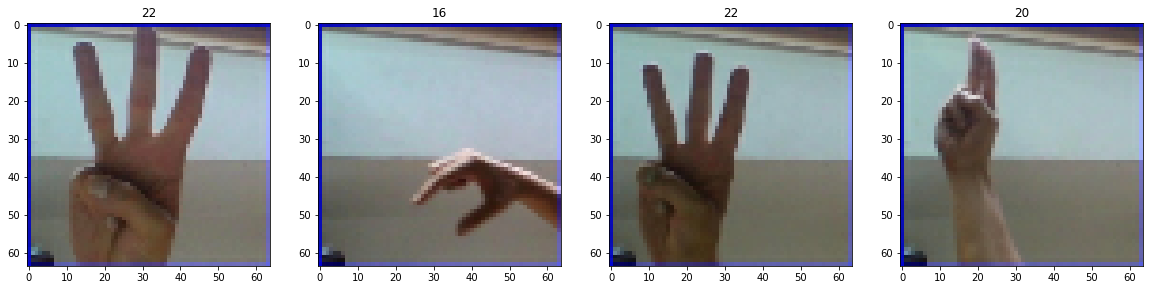

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

preprocessing the data

scale 

dilakukan supaya ukuran min dan max nya dalam rentang 0 dan 1

In [ ]:
#transformasi map digunakan pada setiap  element dari dataset yang berfungsi untuk mereturn dataset baru yang telah ditransformasi, dalam hal ini adalah transformasi scaling

# referensi: - https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.00261949, 0.0051777 , 0.88598347],
          [0.05171569, 0.0397212 , 0.71937805],
          [0.04960172, 0.0513174 , 0.72659314],
          ...,
          [0.070481  , 0.03002451, 0.72037375],
          [0.04299939, 0.04344363, 0.70543814],
          [0.07696079, 0.04607843, 0.8216605 ]],
 
         [[0.05258885, 0.06263787, 0.7606771 ],
          [0.51383275, 0.5676164 , 0.5391544 ],
          [0.5342065 , 0.57538295, 0.5445159 ],
          ...,
          [0.33088234, 0.2044424 , 0.13679534],
          [0.27832416, 0.17489277, 0.1176777 ],
          [0.24727328, 0.15948223, 0.42340687]],
 
         [[0.0588848 , 0.08017769, 0.7699908 ],
          [0.7320772 , 0.809038  , 0.7994792 ],
          [0.7435968 , 0.8240962 , 0.8329197 ],
          ...,
          [0.49857536, 0.357644  , 0.27791053],
          [0.4546722 , 0.3296722 , 0.2539522 ],
          [0.36864278, 0.27486214, 0.5665441 ]],
 
         ...,
 
         [[0.021875  , 0.02841605, 0.7343597 ],
          [0.13432

# 1b. split the data into train and validation data

In [ ]:
# tiap batch berisi 813 data
len(data)

813

In [ ]:
#bagi dengan proporsi 80:20 
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)+1

In [ ]:
train_size

650

In [ ]:
val_size

163

In [ ]:
#transformasi take dan skip digunakan untuk mengambil dan mengskip jumlah data dengan ketentuan yang diperlukan
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

#referensi : https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take

In [ ]:
len(train)

650

dataset telah dibagi dengan proporsi training:validation = 80:20
training [80] = 650
validation [20] = 163

# 1c. arsitektur baseline

*Saya akan menggunakan keras untuk membuat arsitektur CNN* 

### inisialiasi CNN

In [ ]:
cnn = tf.keras.models.Sequential()

#### Buat baseline arsitektur

= baseline arsitektur dibuat dengan ketentuan sebagai berikut:

*Convolutional layer pertama dengan kernel size = 5, activation function = ReLu, dan input shape sesuai dengan gambar (n=64)*. Convolutional digunakan untuk membuat features 

In [ ]:
#Convolutional2D
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))

Pooling dilakukan untuk mengurangi dimensi dengan mengextract important features dari convolutional layer. Pooling yang digunakan = MaxPool2D by keras

In [ ]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

*Convolutional layer kedua dengan kernel size = 3, activation function = ReLu, dan input shape sesuai = (n/2=32)*

In [ ]:
#Convolutional2D
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

*Convolutional layer ketiga dengan kernel size = 3, activation function = ReLu, dan input shape sesuai = (n/2=32)*

In [ ]:
#Convolutional2D
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

*Flatten layer digunakan untuk mengubah matrix menjadi satu array*

referensi : - https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

In [ ]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

Full connection layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=26, activation='softmax'))

### Train cnn model

compile the model

In [ ]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

tampung pada variable history agar bisa plotting accuracy dan loss

In [ ]:
history = cnn.fit(x = train, validation_data = val , shuffle=True,epochs = 20)

Epoch 1/20
650/650 [==============================] - 72s 110ms/step - loss: 0.8533 - accuracy: 0.7402 - val_loss: 0.1191 - val_accuracy: 0.9652
Epoch 2/20
650/650 [==============================] - 68s 104ms/step - loss: 0.0871 - accuracy: 0.9728 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 3/20
650/650 [==============================] - 64s 99ms/step - loss: 0.0296 - accuracy: 0.9921 - val_loss: 0.0175 - val_accuracy: 0.9950
Epoch 4/20
650/650 [==============================] - 66s 101ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 5/20
650/650 [==============================] - 66s 101ms/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 6/20
650/650 [==============================] - 66s 102ms/step - loss: 0.0366 - accuracy: 0.9900 - val_loss: 0.0100 - val_accuracy: 0.9983
Epoch 7/20
650/650 [==============================] - 67s 104ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0174 - val_acc

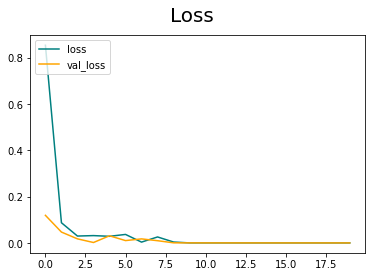

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

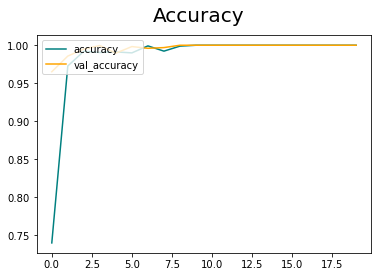

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

seperti yang bisa kita lihat diatas, pada epoch 1-7 , akurasi dan validation loss yang dihasilkan mempunnyai hasil yang bagus. Tetapi, meskipun mempunyai accuracy yang bagus, validation loss pada epoch ke-8 sampai 20  mempunyai loss yang sangat besar (keluar dari range 0-1). Hal ini menandakan adanya overfitting pada saat mentraining data kita.

Penyebabnya adalah ketika menggunakan cross-entropy loss untuk klasifikasi, prediksi yang jelek akan mendapatkan punishment yang lebih kuat dibandigkan dengan prediksi yang bagus. Ini berarti ketika kita mempunyai banyak image dengan loss yang rendah namun terdapat satu image lain yang mempunyai loss yang sangat tinggi, maka loss validation kita akan tiba-tiba spiking-up. Hasil yang ditunjukan pada epoch ke-20 yaitu accuracy dan val loss kedua-duanya naik menyebabkan overfit. Hal ini menyebabkan network hanya belajar pada pola tertentu yang relevan untuk training set dan kurang baik untuk generalisasi. Namun disaat yang bersamaan, network tetap mempelajari pattern yang berguna untuk generalisasi karena makin banyak image untuk diklasifikasi

referensi: - https://stats.stackexchange.com/questions/282160/how-is-it-possible-that-validation-loss-is-increasing-while-validation-accuracy

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
tuner = kt.Hyperband(cnn1,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

https://stats.stackexchange.com/questions/282160/how-is-it-possible-that-validation-loss-is-increasing-while-validation-accuracy

# 1d. dropout, batch normalization, tuning hyperparameter


In [ ]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

In [ ]:
cnnrework = tf.keras.models.Sequential()

In [ ]:
cnnrework.add(Dropout(0.25))

In [ ]:
cnnrework.add(BatchNormalization())

In [ ]:
cnnrework.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnnrework.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnnrework.add(Dropout(0.25))

In [ ]:
cnnrework.add(BatchNormalization())

In [ ]:
cnnrework.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnnrework.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnnrework.add(Dropout(0.25))

In [ ]:
cnnrework.add(BatchNormalization())

In [ ]:
cnnrework.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnnrework.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnnrework.add(Dropout(0.25))

In [ ]:
cnnrework.add(BatchNormalization())

In [ ]:
cnnrework.add(tf.keras.layers.Flatten())

In [ ]:
cnnrework.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnnrework.add(tf.keras.layers.Dense(units=26, activation='softmax'))

### compile the cnn

In [ ]:
cnnrework.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = cnnrework.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
650/650 [==============================] - 76s 115ms/step - loss: 1.3852 - accuracy: 0.5395 - val_loss: 9.2688 - val_accuracy: 0.0715
Epoch 2/20
650/650 [==============================] - 74s 114ms/step - loss: 0.4690 - accuracy: 0.8339 - val_loss: 11.2017 - val_accuracy: 0.1117
Epoch 3/20
650/650 [==============================] - 73s 112ms/step - loss: 0.2655 - accuracy: 0.9061 - val_loss: 12.4718 - val_accuracy: 0.1104
Epoch 4/20
650/650 [==============================] - 74s 114ms/step - loss: 0.1782 - accuracy: 0.9389 - val_loss: 14.3477 - val_accuracy: 0.0946
Epoch 5/20
650/650 [==============================] - 74s 114ms/step - loss: 0.1318 - accuracy: 0.9525 - val_loss: 14.1881 - val_accuracy: 0.1198
Epoch 6/20
650/650 [==============================] - 75s 114ms/step - loss: 0.1146 - accuracy: 0.9602 - val_loss: 15.3686 - val_accuracy: 0.1235
Epoch 7/20
650/650 [==============================] - 74s 114ms/step - loss: 0.0912 - accuracy: 0.9682 - val_loss: 12.5394 - 

In [ ]:
cnnrework.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 64, 64, 3)         0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 16)        1216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 16)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 16)      

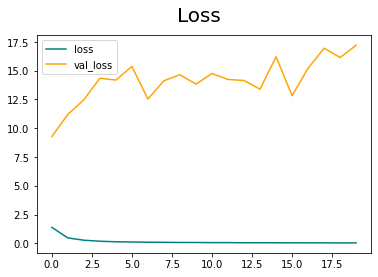

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

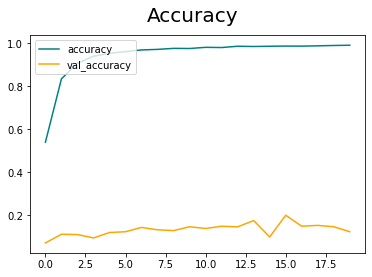

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

arsitektur cnn telah dilakukan modifikasi. Modifikasi yang dilakukan adalah adanya penambahan layer dropout dan juga layer batchnormalization. Penambahan layer dropout mengatasi masalah overfitting yang ada. Overfitting disebabkan oleh adanya pattern palsu yang dipelajari network dalam training data. Untuk mengenali pola ini, weight dijadikan patokan untuk mengukur. Dropout layer berfungsi untuk mendrop sedikit random layer unit pada saat training. Hal ini membuat pattern yang palsu lebih sulit dipelajari oleh network pada saat mentraining data sehingga network dipaksa untuk mencari patternyang lebih luas, umum, dan mempunyai bobot yang kuat.

Selain dropout layer, penambahan batch normalization dilakukan untuk menormalisasi data didalam layer network. Batch_normalization dilakukan pada setiap kali batch datang. Hal pertama yang dilakukan adalah menormalisasi dengan mean dan standard deviation masing-masing, kemudian juga akan membuat data memiliki scale yang baru dengan dua trainable rescaling parameter.

referensi: -https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization

Kedua hal tersebut adalah alasan mengapa arsitektur cnnrework lebih baik daripada arsitektur asli

# 1e. evaluation

In [ ]:
import numpy as np
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
test_image = load_img('test/asl_alphabet_test/asl_alphabet_test/B_test.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(result)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [ ]:
res = np.array2string(result)

model cnn sukses memprediksi bahwa gambar yang dinput adalah alphabet B. 

In [ ]:
import numpy as np
#from keras.preprocessing import image
from keras.utils import load_img, img_to_array
test_image = load_img('test/asl_alphabet_test/asl_alphabet_test/J_test.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 19ms/step


In [ ]:
print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


model cnn berhasil memprediksi bahwa gambar yang diinput adalah aphabet J

analisis:
performa dari arsitektur yang terdapat pada 2d dapat dikatakan memiliki performa yang lebih baik dibandingkan dengan arstiktur pada 2c. meskipun mempunyai nilai akurasi yang sedikit lebih kecil dari pada arsitektur 2c (asli), tetapi arsitektur 2d dapat mengatasi permasalahan overfitting pada arsitektur 2c sehingga dapat menghasilkan prediksi yang lebih akurat. Penambahan droput layer dan batch normalization sesudah conv2d dan maaxpooling layer terbukti dapat meningkatkan akurasi dari model. 